In [8]:
# adapting a /mobilenet_v2 СNN model to predict classes from CIFAR10 dataset using transfer learning technology

%pip install keras
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [10]:
# label resiziq

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [11]:
# since the images from the CIFAR10 package are 32x32 using the resize method of the cv2 library, we resize them

# first create empty lists where we will place the modified images
resized_x_train = []
resized_x_test = []

# We go through each image in x_train and x_test, changing their size
for img in x_train:
    resized_img = cv2.resize(img, (224, 224))
    # each changed image is added to the list
    resized_x_train.append(resized_img)

# similar for test feature selection 
for img in x_test:
    resized_img = cv2.resize(img, (224, 224))
    resized_x_test.append(resized_img)

# Convert lists filled with modified values ​​into NumPy arrays
resized_x_train = np.array(resized_x_train)
resized_x_test = np.array(resized_x_test)

Frog


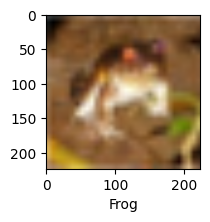

In [12]:


def cifar_pipline_2(x_train, y_train, images, classes):
    for i in range(images):

        # set a smaller scale for the displayed image
        plt.figure(figsize=(15, 2))
        plt.imshow(x_train[i])
        # can be written as above the photo
        print(classes[y_train[i]])
        # so and under, on the x axis
        plt.xlabel(classes[y_train[i]])
        plt.show()

classes_list = ["Airplane", "Auto", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
cifar_pipline_2(resized_x_train, y_train, 1, classes_list)


In [13]:
# data scalling

# x_train_scalled = resized_x_train/255
# x_test_scalled = resized_x_train/255

Frog


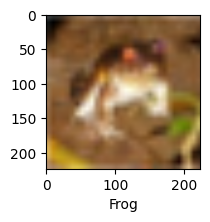

In [14]:
cifar_pipline_2(resized_x_train, y_train, 1, classes_list)

In [15]:

IMAGE_SHAPE = (224, 224)


# we create a model, but as such we download the finished one from the link
# https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4

# initialize the size of the input data as a constant IMAGE_SHAPE (224, 224) and add a third dimension to it,
# which is the number of color channels

model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

IMAGE_SHAPE+(3, )

(224, 224, 3)

In [16]:
# open a file that contains the name of the classes for the finished model model
image_lables = []
with open("/Users/maxkucher/python/CNN/ImageNetLabels.txt", "r") as f:
  image_lables = f.read().splitlines()

In [17]:
image_lables[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

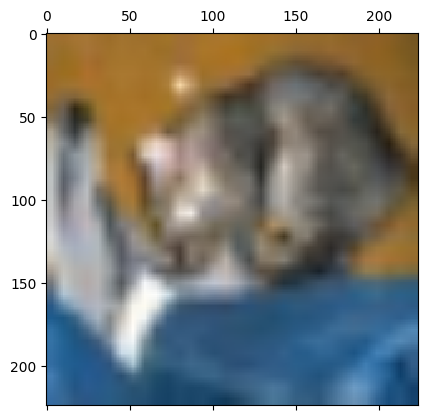

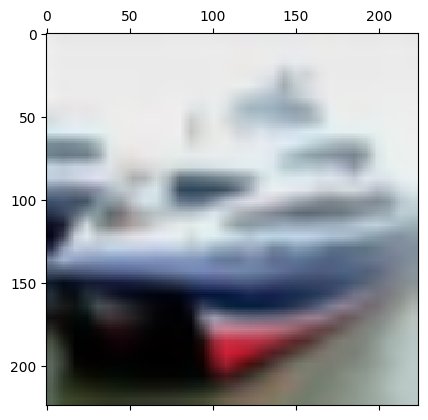

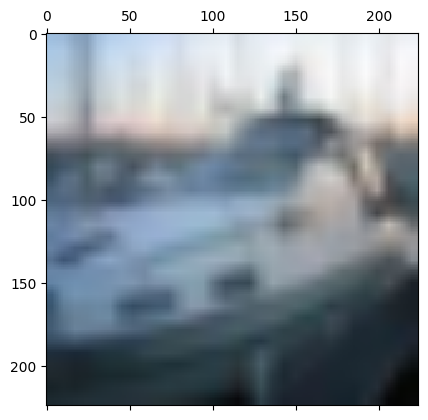

In [18]:
for i in range(3):
    plt.matshow(resized_x_test[i])

In [19]:
# let's try to predict CIFAR10 data objects without pre-processing the model

pred = model.predict(np.array([resized_x_test[0], resized_x_test[1], resized_x_test[2]]))

1/1 [==============================] - 0s 307ms/step


In [20]:
# since the model is not adapted to recognize the cifar10 dataset, it needs to be rebuilt
for i in range(len(pred)):    
    y_pred = np.argmax(pred[i])
    print(image_lables[y_pred])

window screen
spider web
window screen


In [21]:
# to solve the problem of incorrect classification, you need to load all the layers of the previous one into the new model
# except holidays
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# form a model based on feature_extractor_model
# parameter trainable=False - means that all hidden and input layers will be frozen and will not be changed
model_without_output = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False
)

In [22]:
img_clasees = 10

new_model = Sequential([
    model_without_output,
    Dense(img_clasees)

])

In [23]:
new_model.compile(optimizer='SGD', #SGD
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# for greater accuracy try more epochs - about 20
new_model.fit(resized_x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 219s 139ms/step - loss: 1.6986 - accuracy: 0.3883
Epoch 2/5
1563/1563 [==============================] - 216s 138ms/step - loss: 1.5085 - accuracy: 0.4583
Epoch 3/5
1563/1563 [==============================] - 216s 138ms/step - loss: 1.4508 - accuracy: 0.4795
Epoch 4/5
1563/1563 [==============================] - 218s 139ms/step - loss: 1.4197 - accuracy: 0.4935
Epoch 5/5
1563/1563 [==============================] - 217s 139ms/step - loss: 1.3974 - accuracy: 0.5016


In [24]:
new_model.evaluate(resized_x_test, y_test)

313/313 [==============================] - 43s 136ms/step - loss: 1.5148 - accuracy: 0.4498


[1.5148359537124634, 0.4498000144958496]

In [28]:
pred = new_model.predict(resized_x_test)

313/313 [==============================] - 43s 136ms/step


Predicted value: Cat


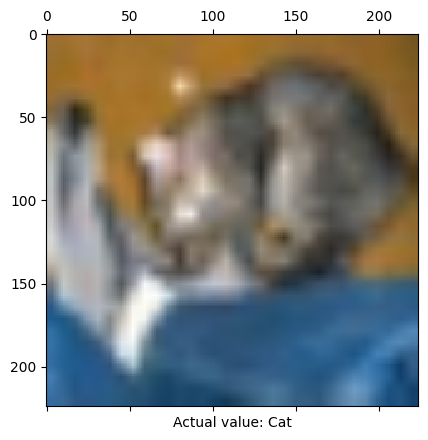

Predicted value: Auto


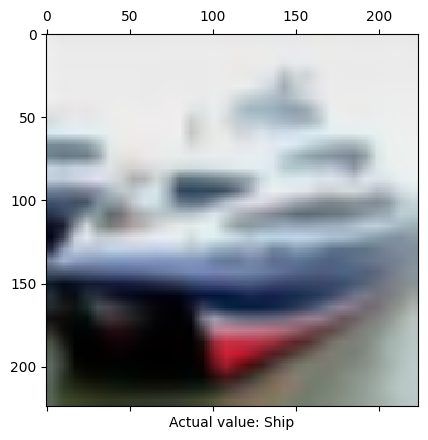

Predicted value: Ship


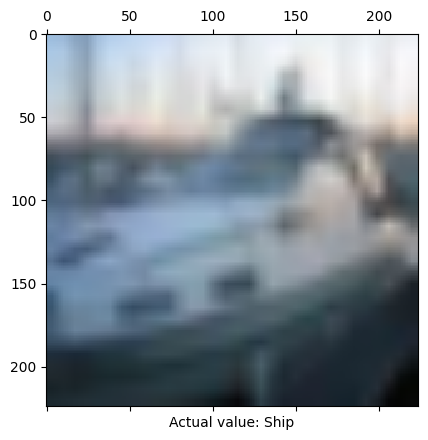

Predicted value: Ship


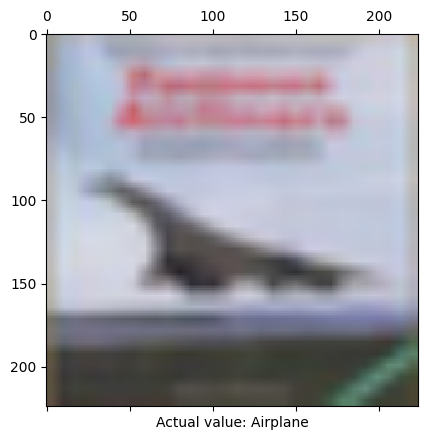

Predicted value: Frog


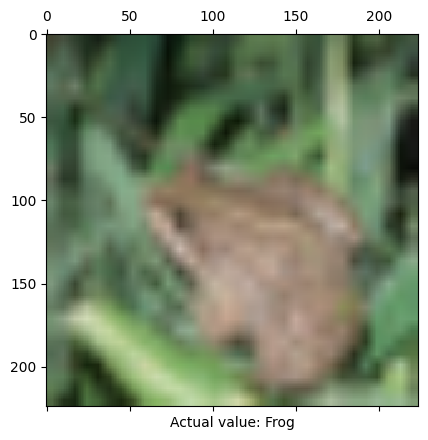

In [37]:
# Rebuilt model predicts images
def pipline_pred(x_test, y_test, predictions, lista, number):
    for i in range(number):
        plt.matshow(x_test[i])
        plt.xlabel(f"Actual value: {lista[y_test[i]]}")
        y_pred = np.argmax(predictions[i])
        print(f"Predicted value: {classes_list[y_pred]}")
        plt.show()


classes_list = ["Airplane", "Auto", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
pipline_pred(resized_x_test, y_test, pred, classes_list, 5)